<a href="https://colab.research.google.com/github/puraminy/mini_proj3/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Alphabets Dataset

rm: cannot remove 'mini_proj3': No such file or directory
Cloning into 'mini_proj3'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 176 (delta 19), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (176/176), 6.68 MiB | 17.06 MiB/s, done.
Resolving deltas: 100% (84/84), done.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


((500, 784), (500,), 7, 0)

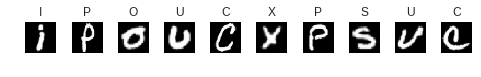

In [2]:
#!git clone "https://github.com/puraminy/mini_proj3"
!rm -r 'mini_proj3'
!git clone "https://github.com/puraminy/mini_proj3"
from mini_proj3.mysom import MiniSom

import numpy as np
alphabet = np.load('mini_proj3/Alphabets.npy')
label = np.load('mini_proj3/Alphabet_labels.npy')
label2 = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z']


import matplotlib.pyplot as plt
idx = np.random.randint(499, size=10)

fig, axes = plt.subplots(1, 10)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=None, wspace=0.5)

# for i in range(len(alphabet)):
#   alphabet[i] = alphabet[i] * (255.0 / alphabet[i].max())

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
alphabet = sc.fit_transform(alphabet)
  
pltalpha = alphabet[idx,:]
pltlbl = label[idx]

for i in range(10):
  axes[i].imshow(-1*np.reshape(pltalpha[i,:],[28,28]))
  axes[i].axis('off')
  xlabel = label2[pltlbl[i]]; axes[i].set_title(xlabel)



alphabet.shape, label.shape, max(label), min(label)


#SOM

##Constant Parameters

In [3]:
features = 28*28
learningrate = 1
# ini_weights (1) PCA
#som0 = MiniSom(x=25, y=25, input_len=features)  # initialization of 25x25 SOM
#som0.pca_weights_init(alphabet)
#ini_weights = som0._weights.copy()

# ini_weights (2) Distribute from min to max value of input data [0:1]    
#ini_weights = np.expand_dims(np.linspace(0, 1, x*y),axis=1)*np.ones([1,features])
#ini_weights = np.reshape(ini_weights, [x, y, features])

# ini_weights (3) Input mean values    
#ini_weights = np.expand_dims(np.mean(alphabet,axis=0),axis=1)*np.ones([1,x*y])
#ini_weights = np.reshape(weights, [x, y, features])

# ini_weights (4) Random
#ini_weights = np.random.random([x,y,features])
som0 = MiniSom(x=25, y=25, input_len=features)  # initialization of 25x25 SOM
som0.random_weights_init(alphabet)
ini_weights = som0._weights.copy()

# ini_weights (5) Zeros
#ini_weights = np.zeros([x,y,features])

# ini_weights (6) Ones
#ini_weights = np.ones([x,y,features])
print(ini_weights)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [4]:
max_iter = 50
learning_rate = 1
eta = learning_rate
for t in range(max_iter):
  eta1 = learning_rate / (1+t/(max_iter/2))
  eta2 = learning_rate * np.exp(-t / max_iter)
  eta3 = learning_rate * np.exp(-t*0.01)

  print(eta3)

1.0
0.9900498337491681
0.9801986733067553
0.9704455335485082
0.9607894391523232
0.951229424500714
0.9417645335842487
0.9323938199059483
0.9231163463866358
0.9139311852712282
0.9048374180359595
0.8958341352965282
0.8869204367171575
0.8780954309205613
0.8693582353988059
0.8607079764250578
0.8521437889662113
0.8436648165963837
0.835270211411272
0.8269591339433623
0.8187307530779818
0.8105842459701871
0.8025187979624785
0.794533602503334
0.7866278610665535
0.7788007830714049
0.7710515858035663
0.7633794943368531
0.7557837414557255
0.7482635675785653
0.7408182206817179
0.7334469562242892
0.7261490370736909
0.7189237334319262
0.7117703227626097
0.7046880897187134
0.697676326071031
0.6907343306373547
0.6838614092123558
0.6770568744981647
0.6703200460356393
0.6636502501363194
0.6570468198150567
0.6505090947233165
0.6440364210831414
0.6376281516217733
0.631283645506926
0.6250022682827008
0.6187833918061408
0.6126263941844161


#Part A

In [8]:
def decay_lr(lr, t, max_iter):
#   return lr * np.exp(-t*0.01)
  ret = lr #lr / (1+t/(max_iter/2))
  print("ret:", ret)
  return ret
  
def decay_sigma(sigma, t, max_iter):
#   return sigma * np.exp(-t*0.01)
  return sigma
#   return sigma / (1+t/(max_iter/2))

def test(func=None):
  if func != None:
    func(1,5, 100)

test(decay_lr)

ret: 1


ret: 0.9090909090909091
(784,)
ret new: 1.0
ret new: 1.0
ret new: 0.9048374180359595
ret new: 0.9048374180359595
ret new: 0.8187307530779818
ret new: 0.8187307530779818
ret new: 0.7408182206817179
ret new: 0.7408182206817179
ret new: 0.6703200460356393
ret new: 0.6703200460356393
ret new: 0.6065306597126334
ret new: 0.6065306597126334
ret new: 0.5488116360940264
ret new: 0.5488116360940264
ret new: 0.49658530379140947
ret new: 0.49658530379140947
ret new: 0.44932896411722156
ret new: 0.44932896411722156
ret new: 0.4065696597405991
ret new: 0.4065696597405991
ret new: 0.36787944117144233
ret new: 0.36787944117144233
ret new: 0.33287108369807955
ret new: 0.33287108369807955
ret new: 0.301194211912202
ret new: 0.301194211912202
winner= (10, 13)  label: P
winner= (4, 16)  label: O
winner= (19, 8)  label: X
winner= (22, 23)  label: U
winner= (14, 20)  label: Z
winner= (16, 17)  label: U
winner= (12, 19)  label: U
winner= (13, 14)  label: X
winner= (12, 4)  label: S
winner= (9, 14)  label: I

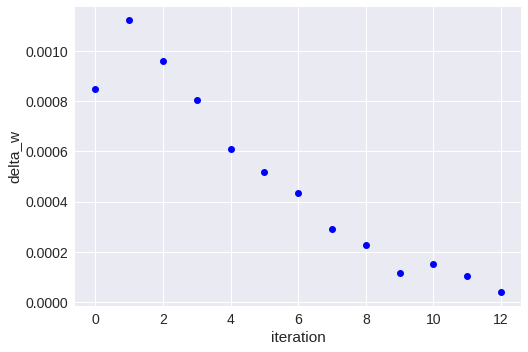

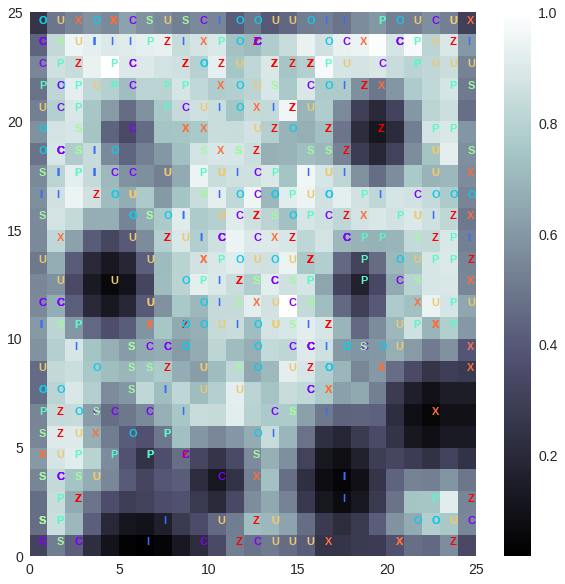

In [17]:
# -*- coding: utf-8 -*-
"""SOM.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/puraminy/mini_proj3/blob/master/SOM.ipynb
"""


def decay_1(lr, t, max_iter):
    ret = lr / (1 + t / (max_iter / 2))
    print("ret:", ret)
    return ret

def decay_2(lr, t, max_iter):
    ret = lr * np.exp(-t*0.1)
    print("ret new:", ret)
    return ret

def decay_sigma(sigma, t, max_iter):
      return sigma * np.exp(-t*0.01)
    # return sigma / (1 + t / (max_iter / 2))

def decay_sigma(sigma, t, max_iter):
    return sigma * np.exp(-t * 0.01)


# return sigma / (1 + t / (max_iter / 2))

def test(func=None):
    if func != None:
        func(1, 5, 100)


test(decay_1)


alphabet.shape, label.shape, max(label), min(label)

# This code added by Ahmad Pouramini

print(alphabet[1].shape)


from mini_proj3.mysom import MiniSom

som = MiniSom(x=25, y=25, input_len=28*28, sigma=1.0, learning_rate=1.0,
              neighborhood_function='gaussian')  # initialization of 25x25 SOM
som.random_weights_init(alphabet)  # initialize weights with random values 
som.train_delta(alphabet, delta=0.0001, max_iteration=4000,
                decay_lr=decay_2,
                decay_sigma=decay_2)

plt.figure(figsize=(10, 10))

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

for x, t in zip(alphabet, label):  # scatterplot
     w = som.winner(x)
     print("winner=", w, " label:" , label2[t])
     plt. text(w[0]+.5,
               w[1]+.5,
               label2[t],
               color=plt.cm.rainbow(t / 7.),
               fontdict={'weight': 'bold',  'size': 11}
               )

plt.show()
# print(som.win_map(alphabet))


In [16]:
weightsA = somA._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somA.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsA.shape[0], 0,  weightsA.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somA.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

plt.figure(figsize=(15, 5))
for i in range(len(mappings)):
  plt.plot(i, len(np.flipud(sorted_values)[i]),'bo')
  plt.xlabel('Node')
  plt.ylabel('samples')
  
  
if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1

result_mat = np.flipud(result_mat)

import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()


ValueError: ignored

#Part B

In [0]:
x = 625; y = 1
ini_weights = np.reshape(ini_weights,[x,y,features])
radius = 1

#neighborhood='mexican_hat'
#neighborhood='bubble'
neighborhood='gaussian'
#neighborhood='triangle'

somB = MiniSom(x=x, y=y, input_len=features, sigma=radius, learning_rate=learningrate, neighborhood_function=neighborhood) 
somB._weights = ini_weights
#somB.random_weights_init(alphabet)  # initialize weights with random values 
somB.train_delta(alphabet, delta=0.0001, max_iteration=2000, verbose=True)

weightsB = somB._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somB.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsB.shape[0], 0,  weightsB.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somB.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

plt.figure(figsize=(15, 5))
for i in range(len(mappings)):
  plt.plot(i, len(np.flipud(sorted_values)[i]),'bo')
  plt.xlabel('Node')
  plt.ylabel('samples')
  
if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1

result_mat = np.flipud(result_mat)

import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()


#Part C

In [0]:
x = 25; y = 25
ini_weights = np.reshape(ini_weights,[x,y,features])
radius = 1

#neighborhood='mexican_hat'
#neighborhood='bubble'
neighborhood='gaussian'
#neighborhood='triangle'

somC = MiniSom(x=x, y=y, input_len=features, sigma=radius, learning_rate=learningrate, neighborhood_function=neighborhood) 
somC._weights = ini_weights
#somC.random_weights_init(alphabet)  # initialize weights with random values 
somC.train_delta(alphabet, delta=0.0001, max_iteration=2000, verbose=True)

weightsC = somC._weights



# Visualizing Results
if x>1 and y>1:
    plt.figure(figsize=(8, 8))
    wmap = {}
    im = 0
    for x, t in zip(alphabet, label):  # scatterplot
        w = somC.winner(x)
        wmap[w] = im
        plt. text(w[0]+.5,
                  w[1]+.5,
                  label2[t],
                  color=plt.cm.rainbow(t / 7.),
                  fontdict={'weight': 'bold',  'size': 11}
                  )
        im = im + 1
    plt.axis([0, weightsC.shape[0], 0,  weightsC.shape[1]])
    #plt.savefig('resulting_images/som_digts.png')
    plt.show()


mappings = somC.win_map(alphabet)
print("Number of Winning Nodes: "+str(len(mappings)))
nodes = list(mappings) # position of nodes that contain values!
values = []
for i in nodes:
    values.append(mappings[i])
sorted_values = sorted(values, key=len)

plt.figure(figsize=(15, 5))
for i in range(len(mappings)):
  plt.plot(i, len(np.flipud(sorted_values)[i]),'bo')
  plt.xlabel('Node')
  plt.ylabel('samples')

if len(mappings)>19:
  selected_nodes = sorted_values[-20:] # 20 nodes with the most data
  result_mat =np.zeros([20,9])
  for i in range(20):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1
          
else:
  selected_nodes = sorted_values
  result_mat =np.zeros([len(mappings),9])
  for i in range(len(mappings)):
      result_mat[i,8] = len(selected_nodes[i])
      for j in range(len(selected_nodes[i])):
          zeroo = alphabet-selected_nodes[i][j]
          pos = np.where(~zeroo.any(axis=1))[0]
          result_mat[i, label[pos]] = result_mat[i, label[pos]]+1

result_mat = np.flipud(result_mat)

import seaborn as sn
import pandas  as pd

df_result = pd.DataFrame(result_mat, range(result_mat.shape[0]), range(9))

aylabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10','11',
            '12', '13', '14', '15', '16', '17', '18', '19', '20']
axlabels = ['C', 'I', 'O', 'P', 'S', 'U', 'X', 'Z', 'Total']

plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(df_result, annot=True, annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=aylabels)  # font size
plt.show()
